In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Train Dataset

In [ ]:
data_train = pd.read_csv('C:/Users/Ashwini/Downloads/SalaryData_Train(1).csv')
data_train

In [ ]:
data_train1 = data_train.drop_duplicates()
data_train1
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_train1.shape

In [ ]:
data_train1.describe()

In [ ]:
data_train1.info()

In [ ]:
data_train1.isna().sum()

#### Label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_train1['workclass']= label_encoder.fit_transform(data_train1['workclass']) 
data_train1['education']= label_encoder.fit_transform(data_train1['education'])
data_train1['maritalstatus']= label_encoder.fit_transform(data_train1['maritalstatus'])
data_train1['occupation']= label_encoder.fit_transform(data_train1['occupation'])
data_train1['relationship']= label_encoder.fit_transform(data_train1['relationship'])
data_train1['race']= label_encoder.fit_transform(data_train1['race'])
data_train1['sex']= label_encoder.fit_transform(data_train1['sex'])
data_train1['native']= label_encoder.fit_transform(data_train1['native'])
data_train1['Salary']= label_encoder.fit_transform(data_train1['Salary'])

In [ ]:
data_train1

In [ ]:
data_train1.info()

In [ ]:
data_train1.shape

In [ ]:
data_train1.isna().sum()

In [ ]:
sns.pairplot(data_train1, hue='Salary')

In [ ]:
plt.figure(figsize = (18, 8));
sns.heatmap(data_train1.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

In [ ]:
import seaborn as sns
sns.distplot(data_train1['salary'])

In [ ]:
plt.plot(data_train1['salary'])

### Test Dataset

In [12]:
data_test = pd.read_csv('C:/Users/Ashwini/Downloads/SalaryData_Test(1).csv')
data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [13]:
data_test1 = data_test.drop_duplicates()
data_test1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Label Encoding

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_test1['workclass']= label_encoder.fit_transform(data_test1['workclass']) 
data_test1['education']= label_encoder.fit_transform(data_test1['education'])
data_test1['maritalstatus']= label_encoder.fit_transform(data_test1['maritalstatus'])
data_test1['occupation']= label_encoder.fit_transform(data_test1['occupation'])
data_test1['relationship']= label_encoder.fit_transform(data_test1['relationship'])
data_test1['race']= label_encoder.fit_transform(data_test1['race'])
data_test1['sex']= label_encoder.fit_transform(data_test1['sex'])
data_test1['native']= label_encoder.fit_transform(data_test1['native'])
data_test1['Salary']= label_encoder.fit_transform(data_test1['Salary'])

In [15]:
data_test1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [16]:
data_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            14130 non-null  int64
 1   workclass      14130 non-null  int32
 2   education      14130 non-null  int32
 3   educationno    14130 non-null  int64
 4   maritalstatus  14130 non-null  int32
 5   occupation     14130 non-null  int32
 6   relationship   14130 non-null  int32
 7   race           14130 non-null  int32
 8   sex            14130 non-null  int32
 9   capitalgain    14130 non-null  int64
 10  capitalloss    14130 non-null  int64
 11  hoursperweek   14130 non-null  int64
 12  native         14130 non-null  int32
 13  Salary         14130 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 1.1 MB


In [17]:
data_test1.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000
mean,39.155414,2.226893,10.223355,10.120736,2.589597,6.054140,1.419321,3.664402,0.669144,1185.899292,94.499646,41.073885,35.367657,0.248408
std,13.429544,0.991812,3.866601,2.602557,1.524079,4.021648,1.597793,0.849100,0.470538,7903.191981,417.955786,12.268036,6.057064,0.432105
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,2.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,38.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,39.000000,1.000000


In [18]:
data_test1.shape

(14130, 14)

In [19]:
data_test1.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

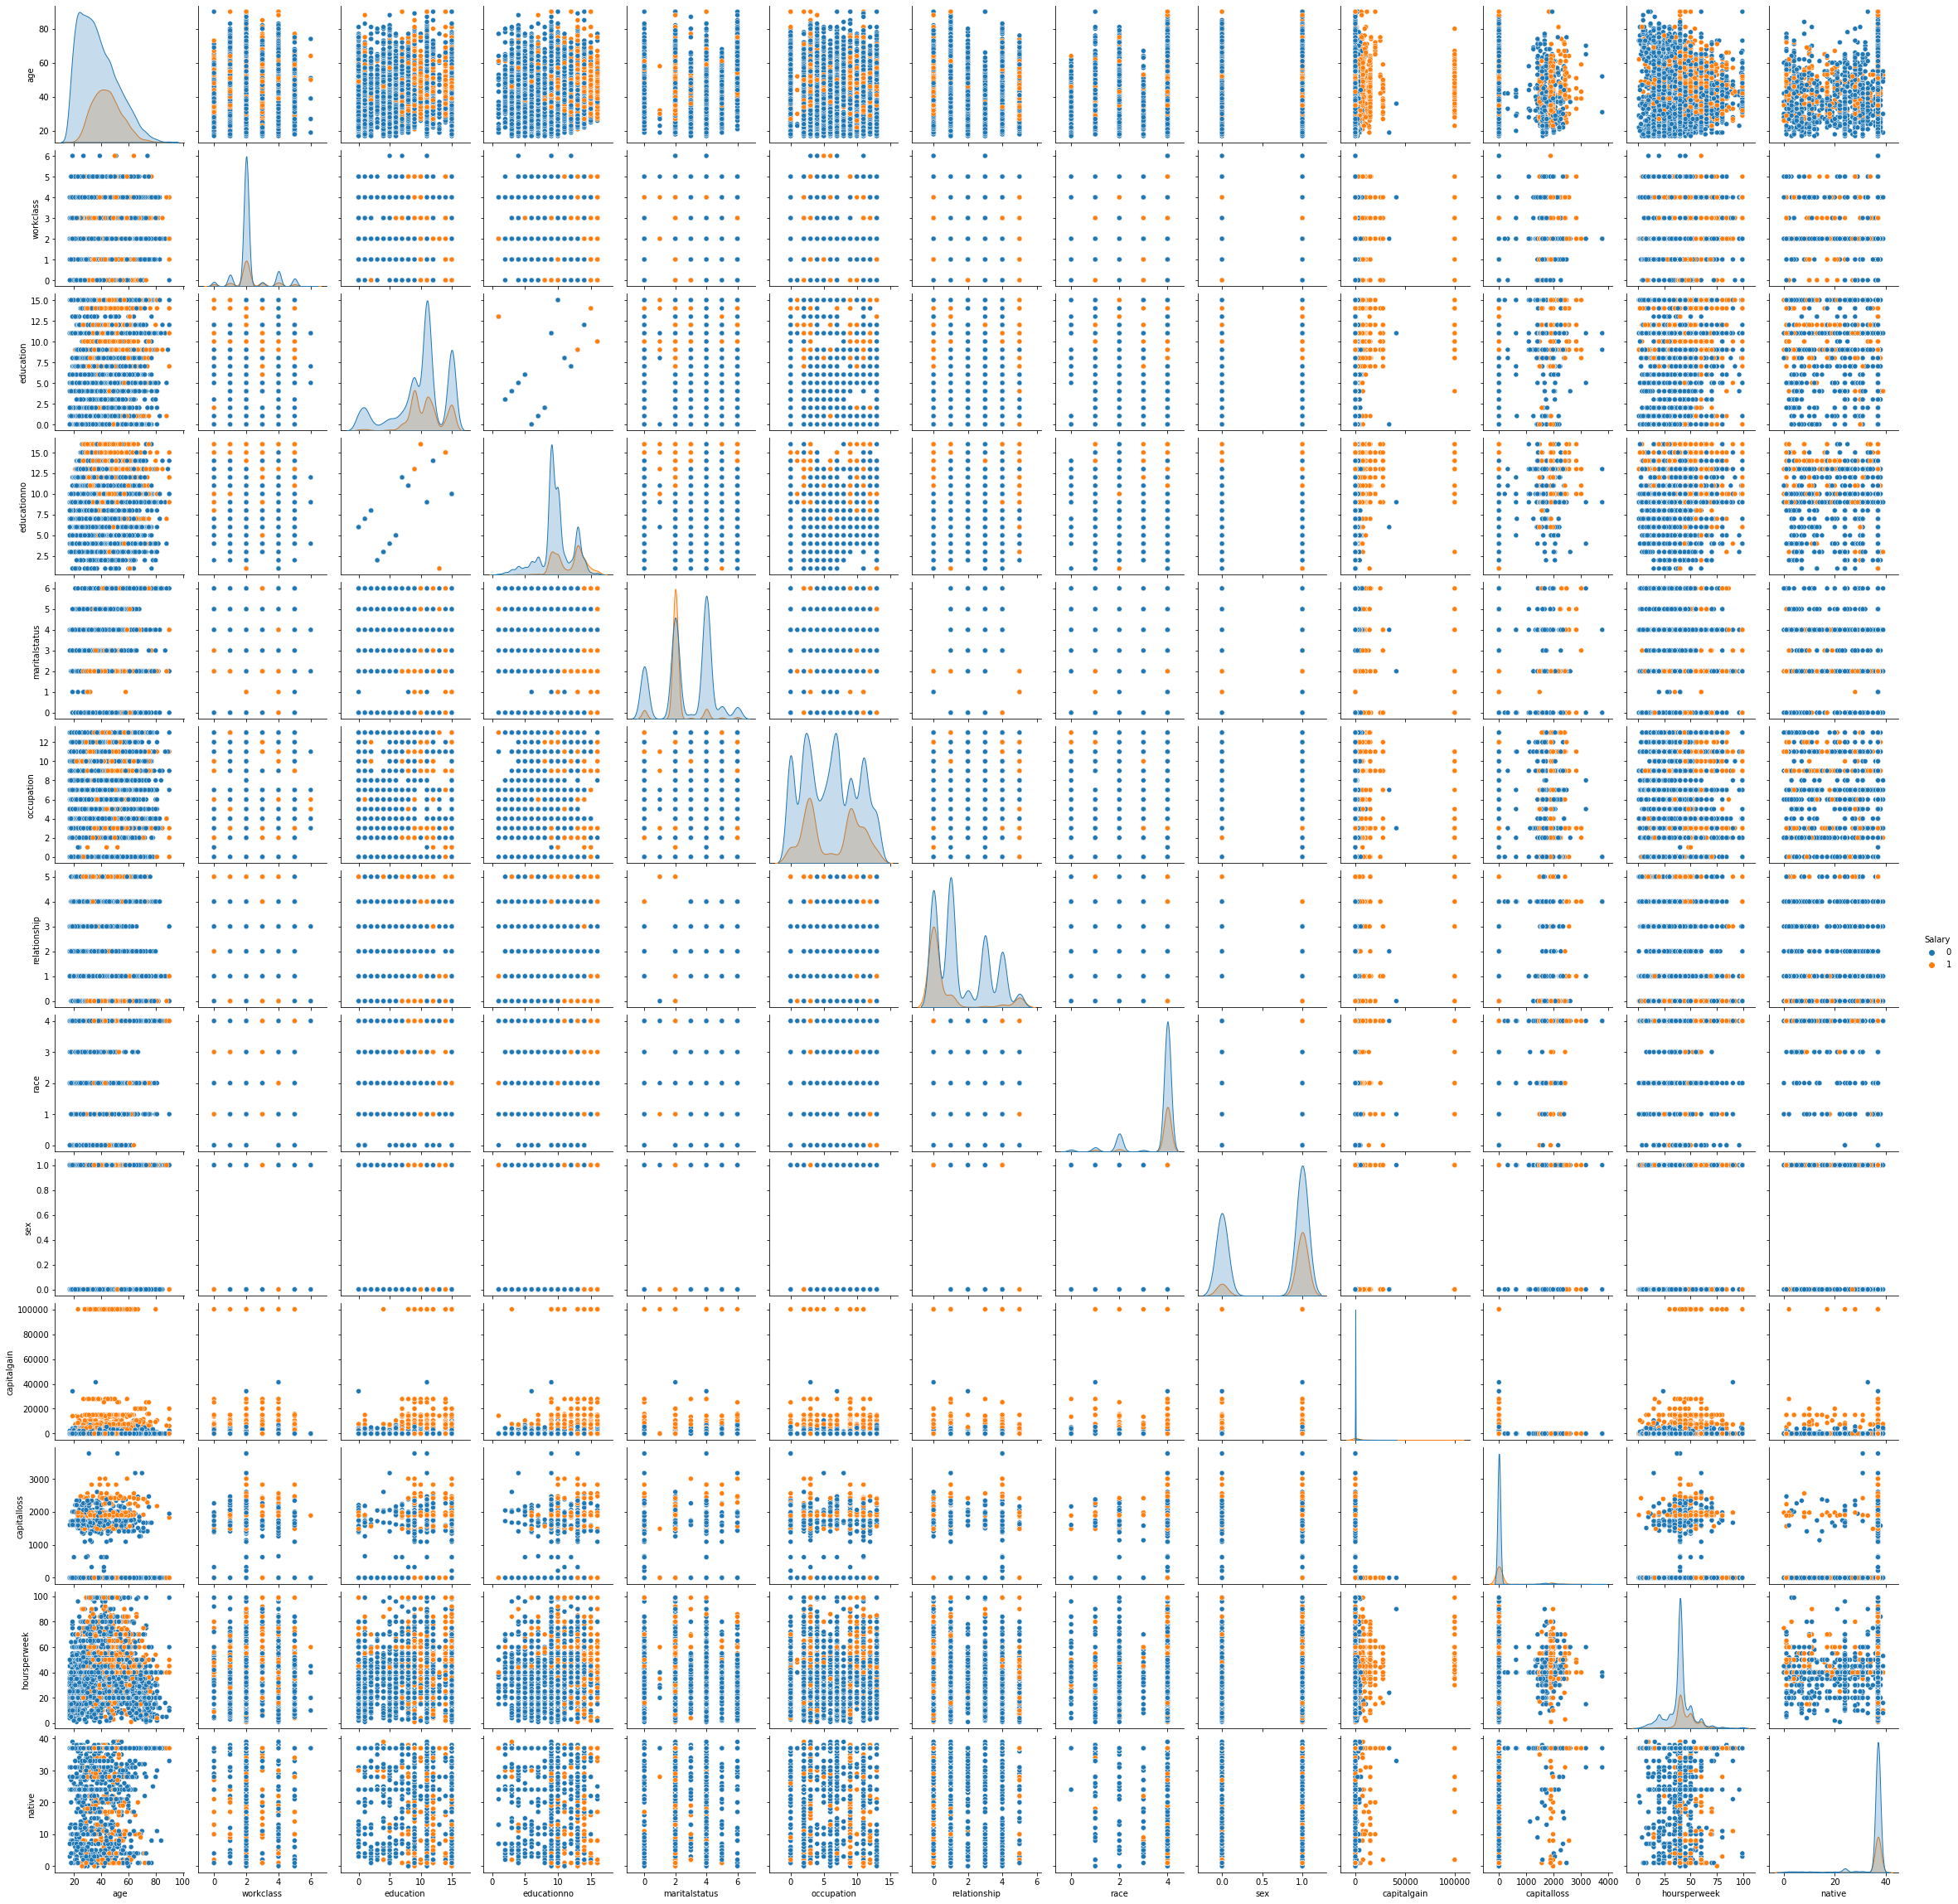

In [20]:
sns.pairplot(data_test1, hue='Salary')

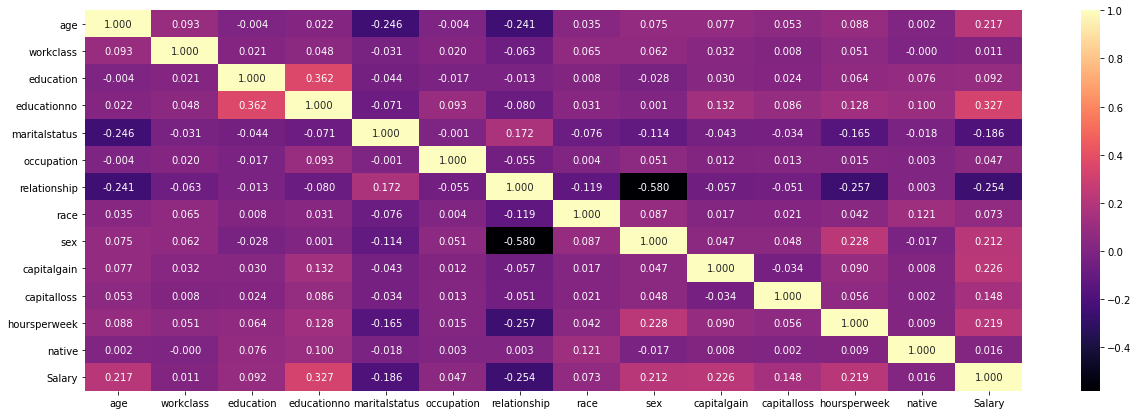

In [21]:
plt.figure(figsize = (21, 7));
sns.heatmap(data_test1.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

#### Applying Train and Test split on Salary Dataset:

In [22]:
x_train = data_train1.iloc[:,0:13]
y_train = data_train1.iloc[:,-1]

In [23]:
x_test = data_test1.iloc[:,0:13]
y_test = data_test1.iloc[:,-1]

In [24]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((26903, 13), (26903,), (14130, 13), (14130,))

### Using SVC 

#### 1) kernal = rbf

In [34]:
model_rbf = SVC(kernel = 'rbf')
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.7960368011323425


In [35]:
confusion_matrix(y_test, pred_test_rbf)

array([[10257,   363],
       [ 2519,   991]], dtype=int64)

#### 2) kernal = linear

In [36]:
model_linear = SVC(kernel = 'linear')
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred_test_linear))

Accuracy: 0.7990799716914366


In [37]:
confusion_matrix(y_test, pred_test_linear)

array([[9795,  825],
       [2014, 1496]], dtype=int64)

#### 3) kernal = poly

In [38]:
model_poly = SVC(kernel = 'poly')
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred_test_poly))

Accuracy: 0.778414720452937


In [39]:
confusion_matrix(y_test, pred_test_poly)

array([[10616,     4],
       [ 3127,   383]], dtype=int64)

#### 4) kernal = sigmoid

In [40]:
model_sigmoid = SVC(kernel = 'sigmoid')
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.7544232130219392


In [41]:
confusion_matrix(y_test, pred_test_sigmoid)

array([[9813,  807],
       [2663,  847]], dtype=int64)

#### Using Grid Search CV

#### 1) kernal = rbf

In [ ]:
class1 = SVC()
param_grid1 = [{'kernel':['rbf'], 'gamma': [50,5,0.5], 'C':[15,12,7,3,0.1,0.0001]}]
gscv1 = GridSearchCV(class1,param_grid1,cv=10)
gscv1.fit(x_train, y_train)

In [ ]:
gscv1.best_params_, gscv1.best_score_

In [ ]:
c1 = SVC(C=15, gamma = 0.5)
c1.fit(x_train, y_train)
y_pred1 = c1.predict(x_test) 
acc1 = accuracy_score(y_test, y_pred1)*100
print("Accuracy:", acc1)

#### 2) kernal = linear

In [ ]:
class2 = SVC()
param_grid2 = [{'kernel':['linear'], 'gamma': [40,5,0.5], 'C':[15,11,7,2,0.1,0.0001]}]
gscv2 = GridSearchCV(class2,param_grid2,cv=10)
gscv2.fit(x_train, y_train)

In [ ]:
gscv2.best_params_, gscv2.best_score_

In [ ]:
c2 = SVC(C=11, gamma = 0.5)
c2.fit(x_train, y_train)
y_pred2 = c2.predict(x_test) 
acc2 = accuracy_score(y_test, y_pred2)*100
print("Accuracy:", acc2)

#### 3) kernal = poly

In [ ]:
class3 = SVC()
param_grid3 = [{'kernel':['poly'], 'gamma': [45,5,0.5,0.1], 'C':[15,10,5,3,0.1,0.0001]}]
gscv3 = GridSearchCV(class3,param_grid3,cv=10)
gscv3.fit(x_train, y_train)

In [ ]:
gscv3.best_params_, gscv3.best_score_

In [ ]:
c3 = SVC(C=15, gamma = 0.1)
c3.fit(x_train, y_train)
y_pred3 = c3.predict(x_test) 
acc3 = accuracy_score(y_test, y_pred3)*100
print("Accuracy:", acc3)

#### 4) kernal = sigmoid

In [ ]:
class4 = SVC()
param_grid4 = [{'kernel':['sigmoid'], 'gamma': [50,5,0.5], 'C':[15,12,7,0.1,0.0001]}]
gscv4 = GridSearchCV(class4,param_grid4,cv=10)
gscv4.fit(x_train, y_train)

In [ ]:
gscv4.best_params_, gscv4.best_score_

In [ ]:
c4 = SVC(C=15, gamma = 0.5)
c4.fit(x_train, y_train)
y_pred4 = c4.predict(x_test) 
acc4 = accuracy_score(y_test, y_pred4)*100
print("Accuracy:", acc4)